# An Analysis of the Ability of Multiple Supervised Learning Classification Models to Detect Credit Card Fraud
<br>
<br>
The incidence of credit card fraud reached an all time high in 2016 with 15.4 million people affected and $16 billion in fraud losses.
To better understand how to address this problem, I am interested in credit card fraud prediction through supervised machine learning methods.
There are various ways authentication systems are bypassed or exploited that allow for fraud to be committed.
As a result, the damage is still in the billions despite consistently increasing security measures.
The liability for these huges losses usually fall on the banks that are involved and can be passed on to the institutions where the fraud occurred.
With supervised learning, credit card fraud can be predicted using underlying factors that aren't readily interpereted by human logic alone.
This means of detecting credit card fraud provides a proactive means of combating this trend and preventing large financial losses. 


In this study, several different types of supervised learning classification models were used on the same labeled financial data to analyze their compared effectiveness when it comes to predicting credit card fraud. 
In addition to this each model type was run three times using different methods to prepare the feature variables. 
This gave insight as to which types of models and feature engineering methods were best suited to predict creditcard fraud based on the data. 
The process used to undertake this study is as follows:
<br>
<br>
Data Exploration and Analysis 
* Viewing the Distribution of the Datapoints
* Checking the Correlatedness of the Classes
* Descriptive Statistics

Preparing The Data For Modeling
* Dealing With Class Imbalance
* Select K Best
* Splitting training and testing data


Modeling the Data 
* Naïve Bayes
* K Nearest Neighbors
* Decision Trees
* Random Forest
* Logistic Regression (and Lasso and Ridge)
* Support Vector Classifier
* Gradient Boost


In [1]:
# Load Packages and CSV

import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib.mlab import PCA as mlabPCA
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.utils import resample
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="sklearn"  
    )

# Set Plot Style
sns.set_style('white')

In [2]:
## Import Files

df = pd.read_csv('creditcard.csv')

## Data Exploration and Analysis

Dataset comes from European Credit Card transactions taken over the course of two days in September 2013. 
The dataset contains 28 components that are the result of transformation through principal components analysis.
To maintain the confidentiality of the accountholders, the original features weren't used for this study. The three features that were not transformed were: The time the transactions took place relative to the start of the study, the dollar amount involved in each transaction, and labels to denote instances of fraud.
This allows for the understanding of fraud occurence in relation to cost and time of day.


In [3]:
df.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
5,2.000,-0.426,0.961,1.141,-0.168,0.421,-0.030,0.476,0.260,-0.569,...,-0.208,-0.560,-0.026,-0.371,-0.233,0.106,0.254,0.081,3.670,0
6,4.000,1.230,0.141,0.045,1.203,0.192,0.273,-0.005,0.081,0.465,...,-0.168,-0.271,-0.154,-0.780,0.750,-0.257,0.035,0.005,4.990,0


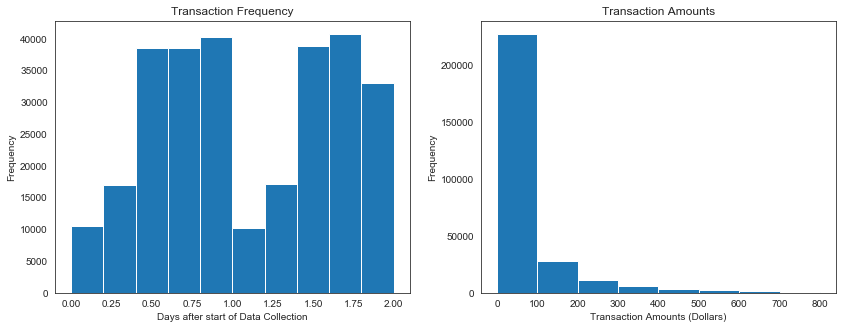

In [4]:
## Plotting Histograms for the Transaction Frequencies and amounts over the two day span
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
plt.hist(df.Time/86400)
plt.title("Transaction Frequency")
plt.xlabel("Days after start of Data Collection")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(df.Amount, bins=[0, 100, 200, 300, 400, 500, 600, 700, 800])
plt.title("Transaction Amounts")
plt.xlabel("Transaction Amounts (Dollars)")
plt.ylabel("Frequency")
plt.show()

The transactions show a binomial distribution with a lower amount of transactions occuring at  the start of each day, and peaking about three quarters into a given day. Around peak hours the number of transactions could reach 40000.
However, the vast majority of transaction amounts are below $100 and the number of transactions drop drastically as amount increases.


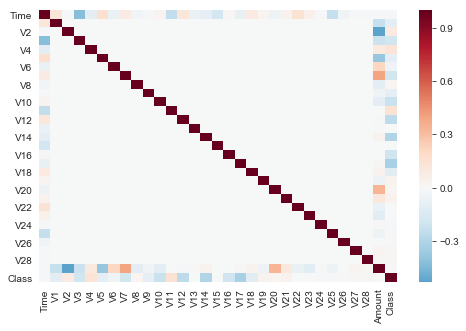

In [5]:
## Visualizing the Correlatedness of the variables

fig, ax = plt.subplots(figsize=(8,5))         
sns.heatmap(df.corr(), cmap='RdBu_r', center=0)
plt.show()

PCA components are inherently uncorrelated but since the time, amount and class variables weren't converted they still show low to mild correlation with the components and eachother.

In [6]:
df.Amount.describe()

count   284807.000
mean        88.350
std        250.120
min          0.000
25%          5.600
50%         22.000
75%         77.165
max      25691.160
Name: Amount, dtype: float64

Descriptive statistics about the transaction amounts show that 75% of the transactions in the two day period fall below \\$77. However, transaction amounts can reach much higher numbers with the max being \\$25,691.

In [7]:

number_outcome_class = df.Class.value_counts()
percent_outcome_class = df.Class.value_counts()/df.Class.value_counts().sum()

print(" \n The number of non-fraudulent transactions: " + str(number_outcome_class[0]))
print(" The number of non-fraudulent transactions: " + str(number_outcome_class[1]))
print(" \n The percentage of non-fraudulent transactions: " + str(percent_outcome_class[0]))
print(" The percentage of non-fraudulent transactions: " + str(percent_outcome_class[1]))

 
 The number of non-fraudulent transactions: 284315
 The number of non-fraudulent transactions: 492
 
 The percentage of non-fraudulent transactions: 0.9982725143693799
 The percentage of non-fraudulent transactions: 0.001727485630620034


The transactions were overwhelmingly nonfraudulent.
The strong class imbalance caused by the dominant negative class was addressed prior to modeling through resampling of both classes.

## Preparing The Data For Modeling

The class imbalance was addressed by downsampling the majority class to preserve computational performance and upsampling the minority class to avoid losing too much of the variance that the models will use as the basis of their predictions.

Each Model was run using two different means of feature selection;
the original features of the dataset and just 20 of the features selected using scikit-learn's select K best function.
The Models were run using the same training and testing sets so that they can be compared.

In [8]:
## Class Balancing by Upsampling Minority Class

# Separate majority and minority classes
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2500,    # to match majority class
                                 random_state=123) # reproducible results

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2500,     # to match minority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_majority_downsampled, df_minority_upsampled])

df.Class.value_counts()

1    2500
0    2500
Name: Class, dtype: int64

In [9]:
## Establish variables based on original components to be used for modeling

x = df.drop(['Class'], axis=1)
y = df.Class

In [10]:
## Establish variables based on select K best to be used for modeling

selector = SelectKBest(f_classif, k=20)
k_predictors = selector.fit_transform(x,y)

In [11]:
## Train Test Split Original Variables And K Selected Variables for Modeling

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

kx_train, kx_test, ky_train, ky_test = train_test_split(k_predictors, y, test_size=0.2, random_state=21)


## Modeling the Data

The financial data was modeled using the following techniques: 
Naïve Bayes,
K Nearest Neighbors,
Decision Trees,
Random Forest,
Logistic Regression (and Lasso and Ridge),
Support Vector Classifier,
Gradient Boost,
Each model was evaluated using accuracy score, cross validation, cross validated AUC, a confusion matrix, and a classification report.

### Naive Bayes

In [12]:
%%time
## train and fit model
bnb = BernoulliNB().fit(x_train, y_train)


CPU times: user 6.05 ms, sys: 2.28 ms, total: 8.33 ms
Wall time: 6.32 ms


In [13]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(bnb.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(bnb, x_test, y_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(bnb, x_test, y_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, bnb.predict(x_test)))+'\n')

print(classification_report(y_test, bnb.predict(x_test)))

accuracy score:
0.915

cross validation:
[0.94029851 0.89054726 0.905      0.90954774 0.90954774]

cross validation with AUC:
[0.9762235  0.94729542 0.96118447 0.98180716 0.96826359]

confusion matrix:
[[511   1]
 [ 84 404]]

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       512
           1       1.00      0.83      0.90       488

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.93      0.91      0.91      1000
weighted avg       0.93      0.92      0.91      1000

CPU times: user 64.2 ms, sys: 3.86 ms, total: 68.1 ms
Wall time: 66.3 ms


In [14]:
%%time
## train and fit model
k_bnb = BernoulliNB().fit(kx_train, ky_train)


CPU times: user 3.77 ms, sys: 1.56 ms, total: 5.33 ms
Wall time: 3.71 ms


In [15]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(k_bnb.score(kx_test, ky_test))+'\n')

print("cross validation:\n" + str(cross_val_score(k_bnb, kx_test, ky_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(k_bnb, kx_test, ky_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(ky_test, k_bnb.predict(kx_test)))+'\n')

print(classification_report(ky_test, k_bnb.predict(kx_test)))

accuracy score:
0.904

cross validation:
[0.89054726 0.895      0.9        0.92       0.91959799]

cross validation with AUC:
[0.97460317 0.96544471 0.96574519 0.96484375 0.96295547]

confusion matrix:
[[476   3]
 [ 93 428]]

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       479
           1       0.99      0.82      0.90       521

   micro avg       0.90      0.90      0.90      1000
   macro avg       0.91      0.91      0.90      1000
weighted avg       0.92      0.90      0.90      1000

CPU times: user 41.3 ms, sys: 3.36 ms, total: 44.6 ms
Wall time: 42.2 ms


Naive Bayes had relatively low accuracy compared to most of the other models.
For both versions of this model, the number of false negatives was greater.
The cross validation showed, that overfitting was not greatly present with this model. 
Using K features resulted in lower accuracy and AUC scores.
Since the scores of the naive bayes models didn't show signs of overfitting, the loss in accuracy from using only 20 features.

### K Nearest Neighbors 

In [16]:
%%time
## train and fit model
knn = neighbors.KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)


CPU times: user 5.72 ms, sys: 1.49 ms, total: 7.21 ms
Wall time: 5.8 ms


In [17]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(knn.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(knn, x_test, y_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(knn, x_test, y_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, knn.predict(x_test)))+'\n')

print(classification_report(y_test, knn.predict(x_test)))

accuracy score:
0.783

cross validation:
[0.70646766 0.67164179 0.655      0.71859296 0.70351759]

cross validation with AUC:
[0.81365167 0.70289281 0.70678271 0.75085911 0.7672832 ]

confusion matrix:
[[377 135]
 [ 82 406]]

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       512
           1       0.75      0.83      0.79       488

   micro avg       0.78      0.78      0.78      1000
   macro avg       0.79      0.78      0.78      1000
weighted avg       0.79      0.78      0.78      1000

CPU times: user 204 ms, sys: 3.26 ms, total: 207 ms
Wall time: 205 ms


In [18]:
%%time
## train and fit model
k_knn = neighbors.KNeighborsClassifier(n_neighbors=10).fit(kx_train, ky_train)


CPU times: user 5.36 ms, sys: 214 µs, total: 5.57 ms
Wall time: 5.74 ms


In [19]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(k_knn.score(kx_test, ky_test))+'\n')

print("cross validation:\n" + str(cross_val_score(k_knn, kx_test, ky_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(k_knn, kx_test, ky_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(ky_test, k_knn.predict(kx_test)))+'\n')

print(classification_report(ky_test, k_knn.predict(kx_test)))

accuracy score:
0.774

cross validation:
[0.66666667 0.695      0.645      0.65       0.6281407 ]

cross validation with AUC:
[0.72574405 0.779998   0.69621394 0.70382612 0.69266194]

confusion matrix:
[[337 142]
 [ 84 437]]

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       479
           1       0.75      0.84      0.79       521

   micro avg       0.77      0.77      0.77      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.78      0.77      0.77      1000

CPU times: user 174 ms, sys: 2.7 ms, total: 176 ms
Wall time: 174 ms


KNN had the lowest out of all of the models in general.
For both versions of this model, the number of false positives was greater.
The cross validation showed that overfitting had a strong presence with this model. 
Using K features resulted in lower accuracy and AUC scores.
It's likely that the nature of this data doesn't lend itself to KNN models because there may be fraudulent and non- fraudulent transactions with similar feature ranges or classes.

### Decision Tree

In [20]:
%%time
## train and fit model
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=6,
    max_depth=25,
    ).fit(x_train, y_train)


CPU times: user 19.9 ms, sys: 1.61 ms, total: 21.5 ms
Wall time: 19.9 ms


In [21]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(decision_tree.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(decision_tree, x_test, y_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(decision_tree, x_test, y_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, decision_tree.predict(x_test)))+'\n')

print(classification_report(y_test, decision_tree.predict(x_test)))


accuracy score:
0.98

cross validation:
[0.93532338 0.91044776 0.96       0.95477387 0.96482412]

cross validation with AUC:
[0.96017436 0.91524668 0.94077631 0.93036184 0.9396604 ]

confusion matrix:
[[492  20]
 [  0 488]]

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       512
           1       0.96      1.00      0.98       488

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

CPU times: user 81.3 ms, sys: 2.31 ms, total: 83.6 ms
Wall time: 82 ms


In [22]:
%%time
## train and fit model
k_decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=6,
    max_depth=25,
    ).fit(kx_train, ky_train)


CPU times: user 21 ms, sys: 1.78 ms, total: 22.8 ms
Wall time: 21 ms


In [23]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(k_decision_tree.score(kx_test, ky_test))+'\n')

print("cross validation:\n" + str(cross_val_score(k_decision_tree, kx_test, ky_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(k_decision_tree, kx_test, ky_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(ky_test, k_decision_tree.predict(kx_test)))+'\n')

print(classification_report(ky_test, k_decision_tree.predict(kx_test)))


accuracy score:
0.981

cross validation:
[0.95024876 0.97       0.895      0.945      0.90954774]

cross validation with AUC:
[0.93318452 0.9599359  0.91826923 0.89302885 0.91761134]

confusion matrix:
[[466  13]
 [  6 515]]

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       479
           1       0.98      0.99      0.98       521

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

CPU times: user 63.5 ms, sys: 3.27 ms, total: 66.8 ms
Wall time: 64.7 ms


The decision tree had very high performance.
For both versions of this model, the number of false positives was greater.
However, the version of the decision tree with all of the features had no false negatives.
The cross validation showed that some signs of overfitting with this model. 
Using K features resulted in greater accuracy and AUC scores.
Despite the fact that using the 20 best features resulted in better performance, the model that used all of the features would still be preferable because minimizing false negatives falls more inline with the business objective.

### Random Forest

In [24]:
%%time
## train and fit model
rf = ensemble.RandomForestClassifier()

parameters = { 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy'],
              'max_depth': list(np.arange(5, 31, 5)), 
              'min_samples_split': list(np.arange(3, 12, 2)),
              'min_samples_leaf': list(np.arange(3, 12, 2))
             }

acc_scorer = make_scorer(accuracy_score)

rfc = GridSearchCV(rf, parameters, scoring=acc_scorer).fit(x_train,  y_train)

## Show Best Parameters
print(rfc.best_params_)


{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5}
CPU times: user 1min 42s, sys: 531 ms, total: 1min 42s
Wall time: 1min 44s


In [25]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(rfc.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(rfc, x_test, y_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(rfc, x_test, y_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, rfc.predict(x_test)))+'\n')

print(classification_report(y_test, rfc.predict(x_test)))


accuracy score:
0.992

cross validation:
[0.9800995  0.92537313 0.945      0.9798995  0.95979899]

cross validation with AUC:
[0.99385774 0.98023578 0.98289316 0.99595715 0.9906509 ]

confusion matrix:
[[508   4]
 [  4 484]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       512
           1       0.99      0.99      0.99       488

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

CPU times: user 4min 58s, sys: 1.41 s, total: 4min 59s
Wall time: 5min 4s


In [26]:
%%time
## train and fit model
k_rfc = GridSearchCV(rf, parameters, scoring=acc_scorer).fit(kx_train,  ky_train)

## Show Best Parameters
print(k_rfc.best_params_)


{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 3}
CPU times: user 1min 26s, sys: 403 ms, total: 1min 27s
Wall time: 1min 28s


In [27]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(k_rfc.score(kx_test, ky_test))+'\n')

print("cross validation:\n" + str(cross_val_score(k_rfc, kx_test, ky_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(k_rfc, kx_test, ky_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(ky_test, k_rfc.predict(kx_test)))+'\n')

print(classification_report(ky_test, k_rfc.predict(kx_test)))


accuracy score:
0.984

cross validation:
[0.96517413 0.985      0.95       0.95       0.94472362]

cross validation with AUC:
[0.99325397 0.98888221 0.98222155 0.97450921 0.98628543]

confusion matrix:
[[473   6]
 [ 10 511]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       479
           1       0.99      0.98      0.98       521

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

CPU times: user 4min 14s, sys: 1.54 s, total: 4min 16s
Wall time: 4min 19s


The random forest almost had the highest performance out of all of the models.
The version of the decision tree with the 20 best features had more false negatives.
The cross validation showed that few signs of overfitting with this model. 
Using K features resulted in stronger cross validated accuracy and AUC scores.
Despite the fact that using the 20 best features resulted in better performance, the model that used all of the features would still be preferable because minimizing false negatives falls more inline with the business objective.

### Logistic Regression

In [28]:
%%time
## train and fit model
lr = LogisticRegression(penalty='l1' ).fit(x_train, y_train)


CPU times: user 67.2 ms, sys: 7.91 ms, total: 75.1 ms
Wall time: 78.2 ms


In [29]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(lr.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(lr, x_test, y_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(lr, x_test, y_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, lr.predict(x_test)))+'\n')

print(classification_report(y_test, lr.predict(x_test)))


accuracy score:
0.947

cross validation:
[0.9800995  0.90547264 0.93       0.94472362 0.95477387]

cross validation with AUC:
[0.99128195 0.97136913 0.9794918  0.99181322 0.9855468 ]

confusion matrix:
[[494  18]
 [ 35 453]]

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       512
           1       0.96      0.93      0.94       488

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

CPU times: user 426 ms, sys: 92 ms, total: 518 ms
Wall time: 141 ms


In [30]:
%%time
## train and fit model
k_lr = LogisticRegression(penalty='l1' ).fit(kx_train, ky_train)


CPU times: user 29.9 ms, sys: 3.1 ms, total: 32.9 ms
Wall time: 32.7 ms


In [31]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(k_lr.score(kx_test, ky_test))+'\n')

print("cross validation:\n" + str(cross_val_score(k_lr, kx_test, ky_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(k_lr, kx_test, ky_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(ky_test, k_lr.predict(kx_test)))+'\n')

print(classification_report(ky_test, k_lr.predict(kx_test)))


accuracy score:
0.942

cross validation:
[0.95522388 0.94       0.94       0.95       0.93467337]

cross validation with AUC:
[0.97797619 0.96694712 0.98086939 0.98006811 0.9638664 ]

confusion matrix:
[[471   8]
 [ 50 471]]

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       479
           1       0.98      0.90      0.94       521

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.95      0.94      0.94      1000

CPU times: user 251 ms, sys: 55.9 ms, total: 307 ms
Wall time: 78.1 ms


The logistic regression classifier had middling performance compared to the rest of the other models.
For both versions of this model, the number of false negatives was significantly greater.
The cross validation showed that some signs of overfitting with this model. 
Using K features resulted in lower accuracy and AUC scores.
The model that used all of the features would be preferable due to its overall better performance.

### Support Vector 

In [32]:
%%time
## train and fit model
svc = SVC().fit(x_train, y_train)


CPU times: user 555 ms, sys: 37.8 ms, total: 592 ms
Wall time: 602 ms


In [33]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(svc.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(svc, x_test, y_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(svc, x_test, y_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, svc.predict(x_test)))+'\n')

print(classification_report(y_test, svc.predict(x_test)))


accuracy score:
0.994

cross validation:
[0.84577114 0.79104478 0.815      0.8040201  0.8040201 ]

cross validation with AUC:
[0.88091936 0.82355855 0.82963185 0.82757227 0.84652315]

confusion matrix:
[[512   0]
 [  6 482]]

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       512
           1       1.00      0.99      0.99       488

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

CPU times: user 599 ms, sys: 4.03 ms, total: 603 ms
Wall time: 601 ms


In [34]:
%%time
## train and fit model
k_svc = SVC().fit(kx_train, ky_train)


CPU times: user 454 ms, sys: 16.7 ms, total: 471 ms
Wall time: 470 ms


In [35]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(k_svc.score(kx_test, ky_test))+'\n')

print("cross validation:\n" + str(cross_val_score(k_svc, kx_test, ky_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(k_svc, kx_test, ky_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(ky_test, k_svc.predict(kx_test)))+'\n')

print(classification_report(ky_test, k_svc.predict(kx_test)))


accuracy score:
0.99

cross validation:
[0.77114428 0.825      0.795      0.81       0.79396985]

cross validation with AUC:
[0.82594246 0.86197917 0.8447516  0.84214744 0.84949393]

confusion matrix:
[[479   0]
 [ 10 511]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       479
           1       1.00      0.98      0.99       521

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

CPU times: user 436 ms, sys: 5.49 ms, total: 441 ms
Wall time: 439 ms


The support vector classifier had relatively low performance out of all of the models.
The accuracy was high but crossvalided AUC scores were low which could be a sign of overfitting.
Both versions of the support vector classifier had more false negatives than false positives.
Using K features resulted in similar cross validated accuracy and AUC scores.
Using support vector classifiers for this data may result in lower performance due to a lack of discrete classes relative to the types of data that may come from the transformed features.

### Gradient Boost 

In [36]:
%%time
## train and fit model
cl = ensemble.GradientBoostingClassifier()

parameters = { 
              'n_estimators': list(np.arange(200, 801, 50)),
              'max_depth': list(range(1,5)),
              'loss': ['deviance', 'exponential']
             }

acc_scorer = make_scorer(accuracy_score)

clf = GridSearchCV(cl, parameters, scoring=acc_scorer).fit(x_train,  y_train)

## Show Best Parameters
print(clf.best_params_)

{'loss': 'exponential', 'max_depth': 4, 'n_estimators': 750}
CPU times: user 13min 56s, sys: 3.37 s, total: 13min 59s
Wall time: 14min 6s


In [37]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(clf.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(clf, x_test, y_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(clf, x_test, y_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, clf.predict(x_test)))+'\n')

print(classification_report(y_test, clf.predict(x_test)))


accuracy score:
0.997

cross validation:
[0.9800995  0.93532338 0.96       0.97487437 0.95979899]

cross validation with AUC:
[0.99663166 0.99098474 0.99489796 0.99747322 0.99211643]

confusion matrix:
[[509   3]
 [  0 488]]

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       512
           1       0.99      1.00      1.00       488

   micro avg       1.00      1.00      1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

CPU times: user 28min 59s, sys: 7.67 s, total: 29min 7s
Wall time: 29min 19s


In [38]:
%%time
## train and fit model
k_clf = GridSearchCV(cl, parameters, scoring=acc_scorer).fit(kx_train,  ky_train)

CPU times: user 10min 6s, sys: 2.47 s, total: 10min 9s
Wall time: 10min 12s


In [39]:
%%time
## Model Evaluation
print("accuracy score:\n" + str(k_clf.score(kx_test, ky_test))+'\n')

print("cross validation:\n" + str(cross_val_score(k_clf, kx_test, ky_test, cv=5))+'\n')

print("cross validation with AUC:\n" + str(cross_val_score(k_clf, kx_test, ky_test, cv=5, scoring='roc_auc'))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(ky_test, k_clf.predict(kx_test)))+'\n')

print(classification_report(ky_test, k_clf.predict(kx_test)))

accuracy score:
0.988

cross validation:
[0.97512438 0.985      0.945      0.95       0.95477387]

cross validation with AUC:
[0.99742063 0.99589343 0.98477564 0.97175481 0.98431174]

confusion matrix:
[[473   6]
 [  6 515]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       479
           1       0.99      0.99      0.99       521

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

CPU times: user 22min 55s, sys: 4.34 s, total: 23min
Wall time: 23min 6s


The gradient boost classifier had the highest performance out of all of the models.
The version of the decision tree with the 20 best features had more false negatives.
The cross validation showed almost no signs of overfitting with this model. 
Using all of the features resulted in stronger cross validated accuracy and AUC scores.
The model that used all of the features is preferable since it minimizes false negatives an has better overall performance.

## Analysis and Conclusion

The gradient boost model that used all of the features turned out the best performer when it came to detecting credit card fraud. 
It had high performance, minimized false negatives, and didn't show a tendency to overfit.
This result was to be expected since the gradient boost builds on another strong model, the decision tree, to lower potential error.
This study gives much more insight into methods and best practices for using supervised learning techniques to detect and, further down the line, combat credit card fraud.
